### Proyecto Python

A partir de una base de datos sobre tendencias y preferencias en la compra de productos online, recogidas en encuestas realizadas a  diferentes personas en Pakistan, se van a realizar visualizaciones para obtener posibles ideas de mejora de negocio y productividad.

Los pasos a realizar serán:
1. Importación de librerias, carga y visualización general de los datos
2. Filtrado de datos
3. Representación gráfica de los datos
4. Conclusiones

## 1- Importación de librerias, carga y visualización general de los datos

In [3]:
#Importación de librerias

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud

In [4]:
#Carga de base de datos y creación del dataframe

df = pd.read_csv("C:/Users/carlo/OneDrive/Documentos/Kaggle dataset/Online Shopping Data.csv")
df.head()

,Gender,Online_Shopping_Freq,Online_Purchase_Proportion,Review_Check_Freq,Attraction_Factor,Retailer_Choice_Factors,Preferred_Payment,Local_vs_Intl_Retailers,Preferred_Marketplace,Security_Concern_Level,Promo_Participation,Price_Sensitivity,Comfortable_Price_Range,Frequent_Products,Major_Drawback,Authenticity_Concern,Desired_Improvements
0,Male,Rarely or Never,0-20 %,Always,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Credit or debit card,"No preference, depends on the product",Daraz,Very concerned,Occasionally participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"Yes, issues with product quality",Neutral or unsure,Enhanced customer reviews and ratings system
1,Female,Rarely or Never,0-20 %,Always,Attractive discounts and promotions,Product reviews and ratings,Cash on delivery (if available),"No preference, depends on the product",Others,Neutral,Rarely or Never participate,Slightly price-sensitive,1k to 5k,Clothing and fashion accessories,"No, I have not experienced any drawbacks",Neutral or unsure,Enhanced customer reviews and ratings system
2,Female,Once in a month,41-60 %,Always,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Cash on delivery (if available),"No preference, depends on the product",Daraz,Somewhat concerned,Frequently participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"Yes, issues with product quality","Yes, always confident in product authenticity ...","Better product descriptions and images, Enhanc..."
3,Male,Once in a month,41-60 %,Always,Ease and Comfort of shopping from home,Product reviews and ratings,Cash on delivery (if available),Prefer local retailers,AliExpress,Somewhat concerned,Rarely or Never participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"No, I have not experienced any drawbacks",Neutral or unsure,Better product descriptions and images
4,Female,Rarely or Never,0-20 %,Frequently,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Cash on delivery (if available),"No preference, depends on the product",Amazon,Very concerned,Rarely or Never participate,Moderately price-sensitive,less than 1k,"Books and media (e.g., movies, music)","Yes, issues with product quality","No, often concerned about product authenticity...","Better product descriptions and images, Improv..."


In [7]:
df.tail()

,Gender,Online_Shopping_Freq,Online_Purchase_Proportion,Review_Check_Freq,Attraction_Factor,Retailer_Choice_Factors,Preferred_Payment,Local_vs_Intl_Retailers,Preferred_Marketplace,Security_Concern_Level,Promo_Participation,Price_Sensitivity,Comfortable_Price_Range,Frequent_Products,Major_Drawback,Authenticity_Concern,Desired_Improvements
196,Female,Multiple times per week,41-60 %,Occasionally,Attractive discounts and promotions,Product reviews and ratings,Cash on delivery (if available),"No preference, depends on the product",Others,Very concerned,Always take advantage of promotions and discounts,Extremely price-sensitive,1k to 5k,Clothing and fashion accessories,"Yes, delayed or problematic deliveries","Yes, always confident in product authenticity ...",Better product descriptions and images
197,Male,Rarely or Never,21-40 %,Always,Attractive discounts and promotions,Product reviews and ratings,Cash on delivery (if available),"No preference, depends on the product",Daraz,Very concerned,Occasionally participate,Moderately price-sensitive,less than 1k,Clothing and fashion accessories,"Yes, issues with product quality","Mostly confident, with occasional concerns","Better product descriptions and images, Improv..."
198,Female,Rarely or Never,21-40 %,Always,Ease and Comfort of shopping from home,Brand reputation and trustworthiness,Cash on delivery (if available),"No preference, depends on the product",Others,Neutral,Occasionally participate,Moderately price-sensitive,5k to 10k,Clothing and fashion accessories,"Yes, issues with product quality",Neutral or unsure,"Better product descriptions and images, Enhanc..."
199,Female,Once in a week,0-20 %,Occasionally,Ease and Comfort of shopping from home,Price and discounts,Cash on delivery (if available),"No preference, depends on the product",Others,Very concerned,Always take advantage of promotions and discounts,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"Yes, issues with product quality","Mostly confident, with occasional concerns",More personalized recommendations
200,Other,Rarely or Never,0-20 %,Occasionally,Time-saving,Brand reputation and trustworthiness,Cash on delivery (if available),"No preference, depends on the product",Others,Somewhat concerned,Rarely or Never participate,Slightly price-sensitive,5k to 10k,Clothing and fashion accessories,"Yes, issues with product quality","No, often concerned about product authenticity...",Better product descriptions and images


In [23]:
df.describe()

,Gender,Online_Shopping_Freq,Online_Purchase_Proportion,Review_Check_Freq,Attraction_Factor,Retailer_Choice_Factors,Preferred_Payment,Local_vs_Intl_Retailers,Preferred_Marketplace,Security_Concern_Level,Promo_Participation,Price_Sensitivity,Comfortable_Price_Range,Frequent_Products,Major_Drawback,Authenticity_Concern,Desired_Improvements
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,4,5,5,4,5,4,4,3,4,4,4,4,4,13,6,4,24
top,Female,Once in a month,0-20 %,Always,Ease and Comfort of shopping from home,Product reviews and ratings,Cash on delivery (if available),"No preference, depends on the product",Daraz,Very concerned,Occasionally participate,Moderately price-sensitive,1k to 5k,Clothing and fashion accessories,"Yes, issues with product quality","Mostly confident, with occasional concerns",Better product descriptions and images
freq,125,99,92,123,98,85,167,150,99,104,67,114,124,114,101,82,92


In [9]:
df.shape

(201, 17)

In [11]:
#Comprobación de valores nulos y tipo de datos en las columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      201 non-null    object
 1   Online_Shopping_Freq        201 non-null    object
 2   Online_Purchase_Proportion  201 non-null    object
 3   Review_Check_Freq           201 non-null    object
 4   Attraction_Factor           201 non-null    object
 5   Retailer_Choice_Factors     201 non-null    object
 6   Preferred_Payment           201 non-null    object
 7   Local_vs_Intl_Retailers     201 non-null    object
 8   Preferred_Marketplace       201 non-null    object
 9   Security_Concern_Level      201 non-null    object
 10  Promo_Participation         201 non-null    object
 11  Price_Sensitivity           201 non-null    object
 12  Comfortable_Price_Range     201 non-null    object
 13  Frequent_Products           201 non-null    object

In [106]:
#Comprobación de duplicados
df.duplicated().sum()

0

In [13]:
#Conversión de los datos a tipo String
df = df.astype("string")

<Axes: >

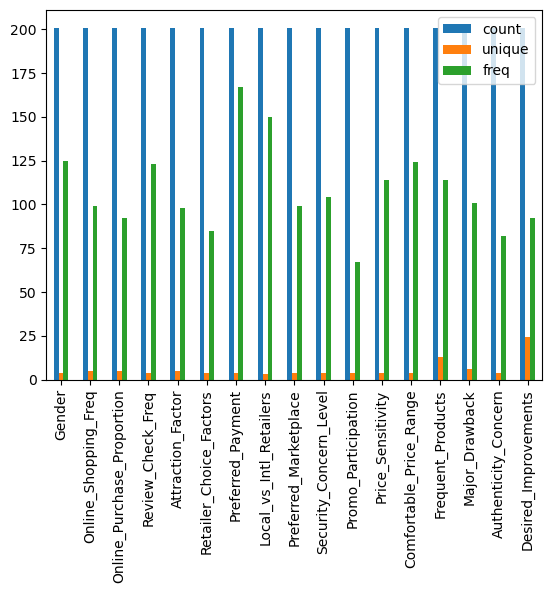

In [15]:
#Comprobación de elementos únicos en cada columna 
df.describe().T.plot(kind='bar')

In [17]:
for columna in df.columns:
    print(f"Valores únicos y frecuencia en la columna '{columna}':")
    print(df[columna].value_counts())
    print("\n")  

Valores únicos y frecuencia en la columna 'Gender':
Gender
Female             125
Male                74
12/3/2023 21:50      1
Other                1
Name: count, dtype: Int64


Valores únicos y frecuencia en la columna 'Online_Shopping_Freq':
Online_Shopping_Freq
Once in a month            99
Rarely or Never            72
Once in a week             18
Multiple times per week    11
12/4/2023 21:50             1
Name: count, dtype: Int64


Valores únicos y frecuencia en la columna 'Online_Purchase_Proportion':
Online_Purchase_Proportion
0-20 %     92
41-60 %    40
21-40 %    39
61-80%     24
81-100%     6
Name: count, dtype: Int64


Valores únicos y frecuencia en la columna 'Review_Check_Freq':
Review_Check_Freq
Always             123
Frequently          37
Occasionally        24
Rarely or Never     17
Name: count, dtype: Int64


Valores únicos y frecuencia en la columna 'Attraction_Factor':
Attraction_Factor
Ease and Comfort of shopping from home    98
Wide variety of products        

## 2- Filtrado de datos

In [19]:
#Filtrado de datos para eliminar los erroneos y desechables
df = df[df["Gender"].isin(["Male", "Female"])]
df = df[df["Major_Drawback"].isin(["Yes, issues with product quality", "No, I have not experienced any drawbacks", "Yes, delayed or problematic deliveries", "Yes, difficulty with returns or refunds"])]


## 3- Representación gráfica de los datos

In [21]:
# Eliminamos en una copia la columna que no interesa para la gráfica que se va a crear
df_bar = df.drop(["Desired_Improvements"], axis=1)

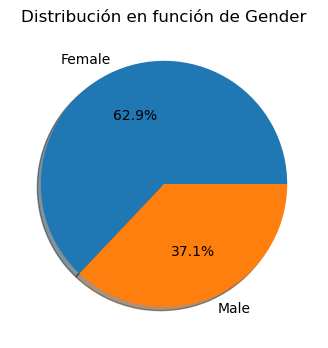

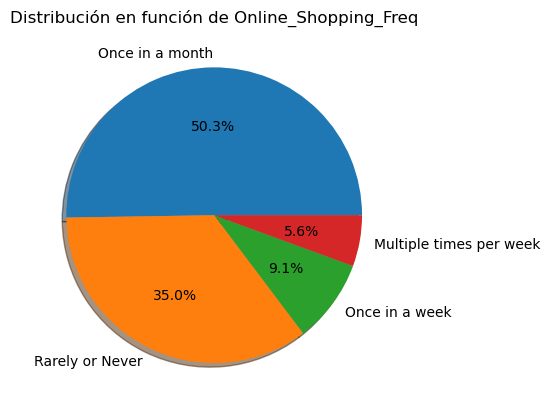

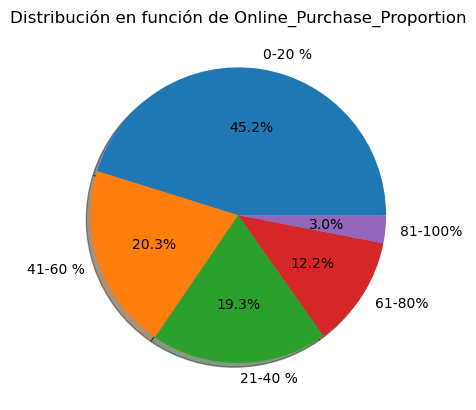

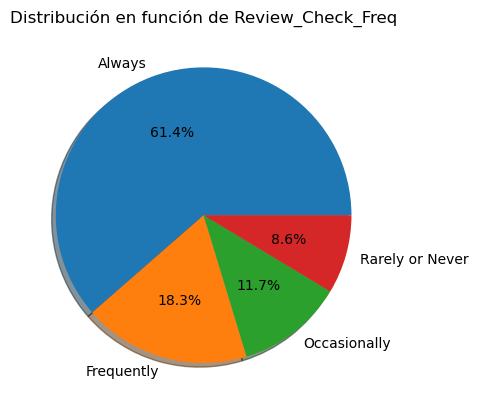

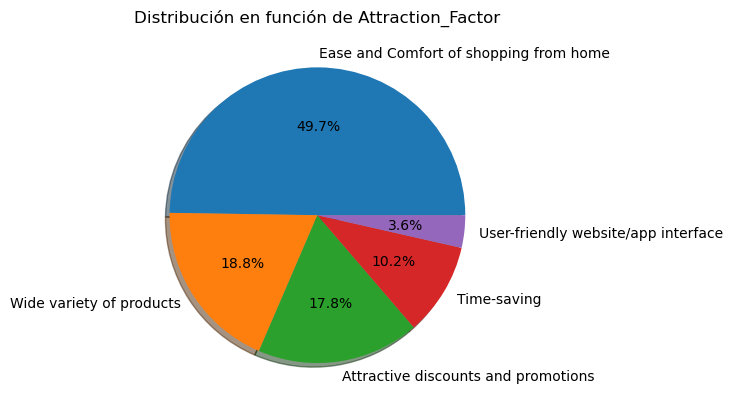

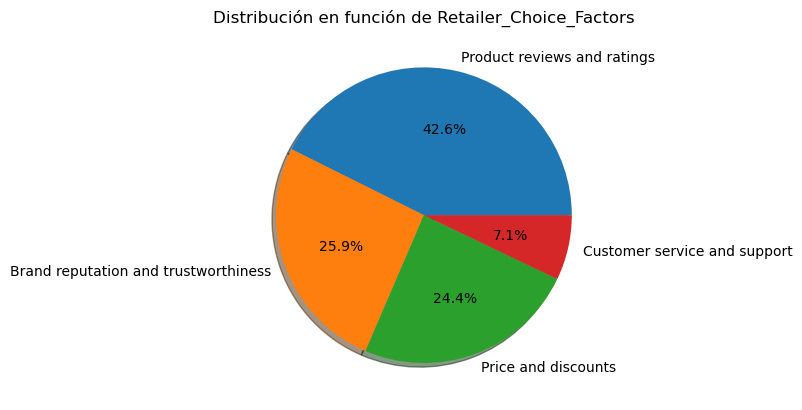

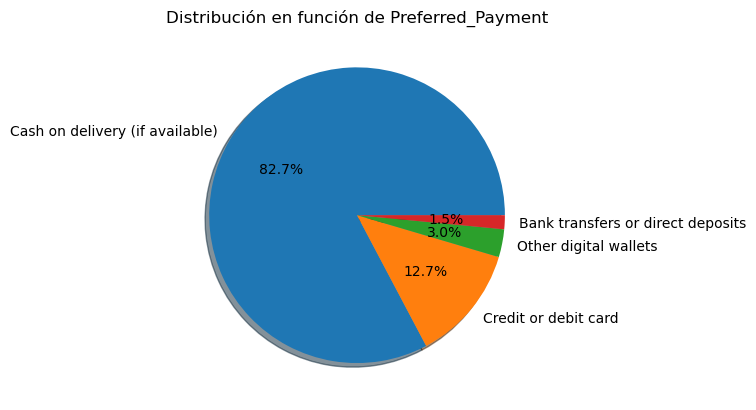

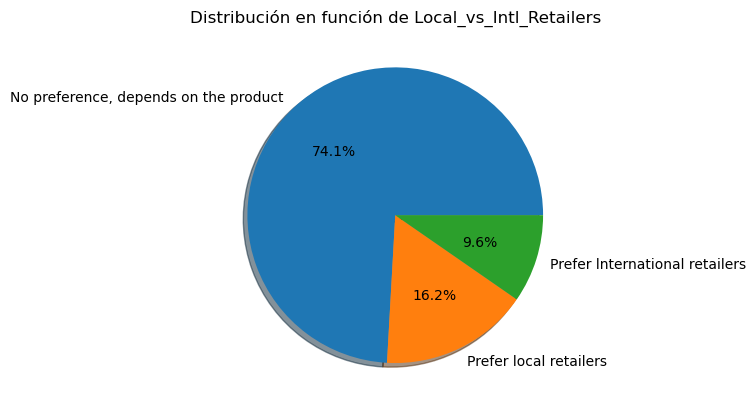

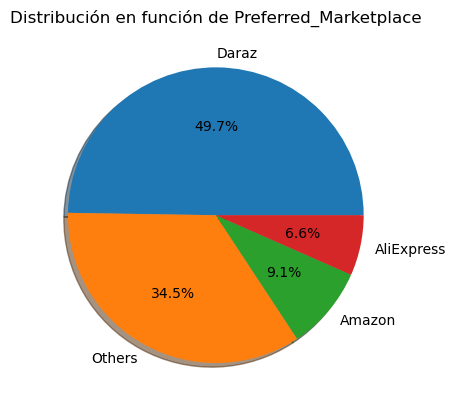

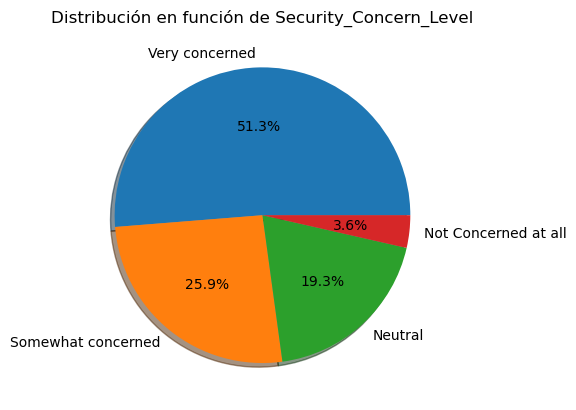

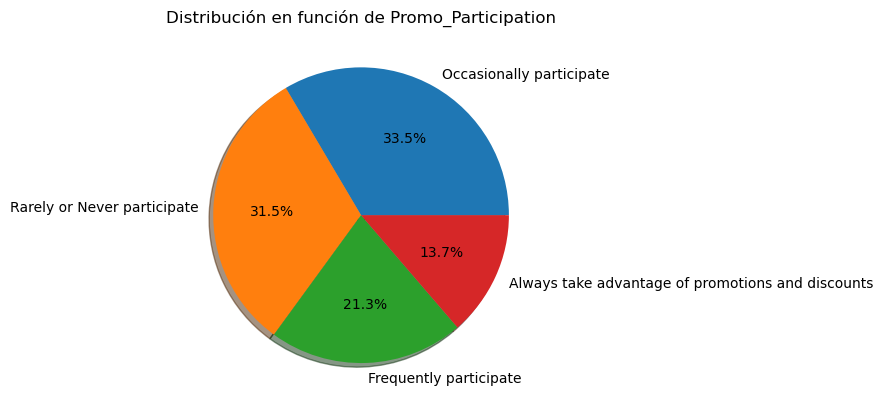

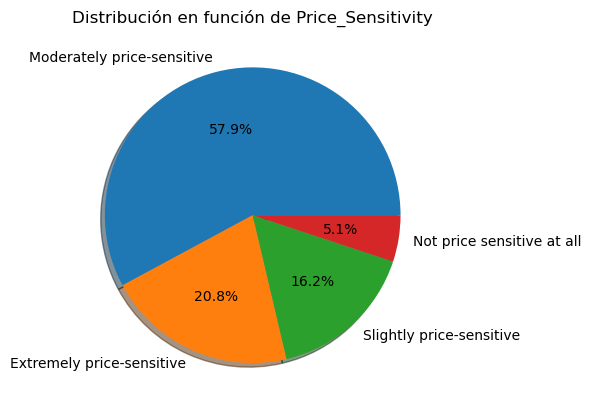

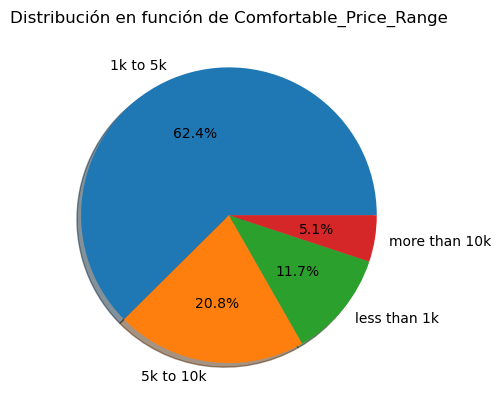

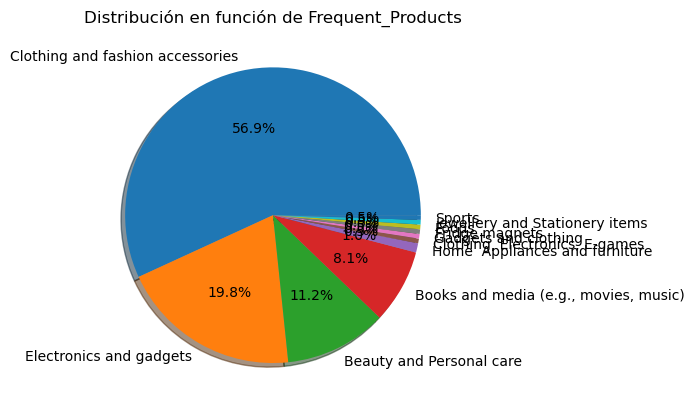

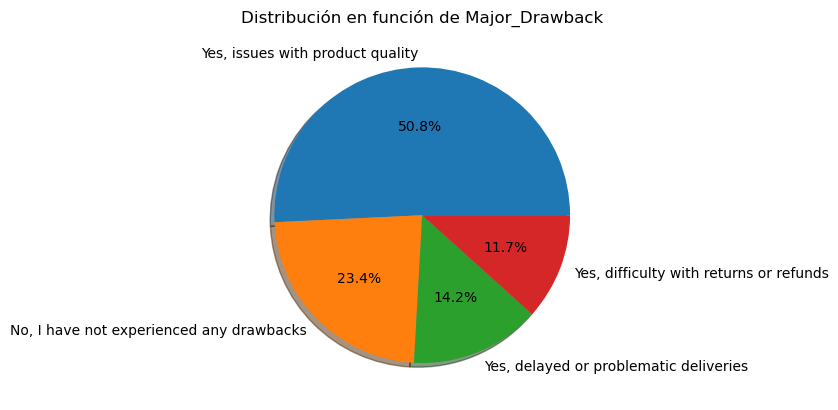

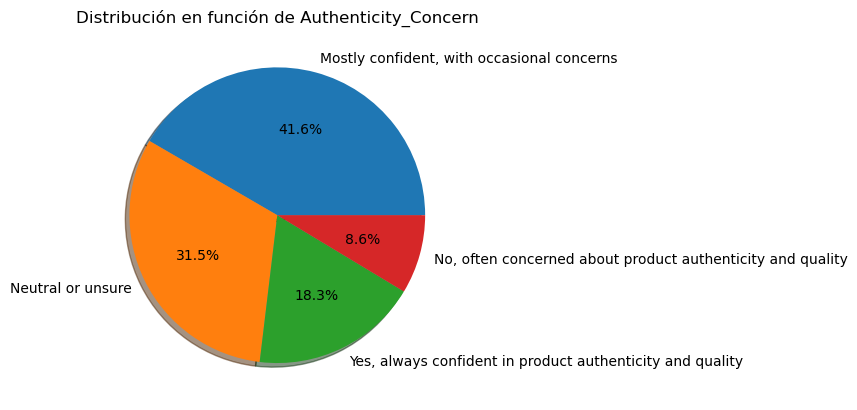

In [23]:
#Visualización de las columnas del dataset menos "Desired_Improvements" en gráficos circulares

plt.figure(figsize=(6,4))
for col in df_bar:
    df[col].value_counts().plot.pie(
    autopct='%1.1f%%',
    shadow=True)
    plt.title(f"Distribución en función de {col}")
    plt.ylabel("")
    plt.show()


## Visualización mediante gráficos de lineas de columnas relevantes en función del género

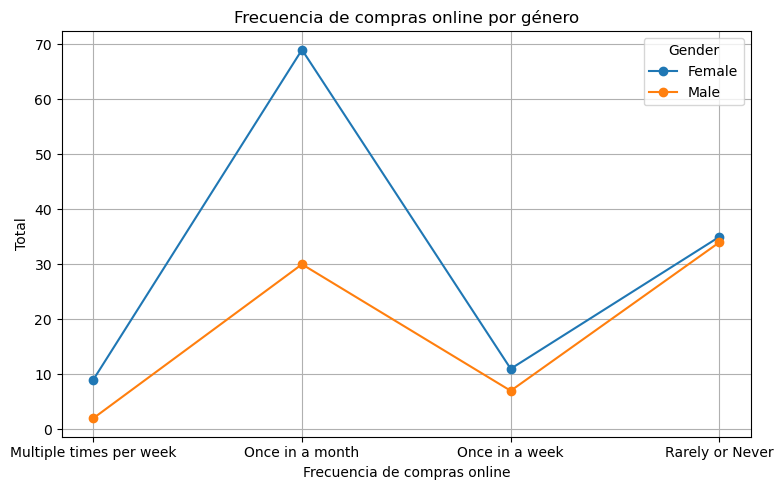

In [25]:
# Agrupar los datos por "Online_Shopping_Freq" y "Gender" y conteo de las ocurrencias
grouped = df.groupby(['Online_Shopping_Freq', 'Gender']).size().reset_index(name='Cantidad')

# Creación del gráfico
plt.figure(figsize=(8, 5))

# Iteración sobre cada género 
for gender in grouped['Gender'].unique():
    subset = grouped[grouped['Gender'] == gender]
    plt.plot(subset['Online_Shopping_Freq'], subset['Cantidad'], label=gender, marker='o')

# Personalización del gráfico
plt.xlabel("Frecuencia de compras online")
plt.ylabel("Total")
plt.title("Frecuencia de compras online por género")
plt.legend(title="Gender")  
plt.grid(True)  
plt.tight_layout()  

plt.show()

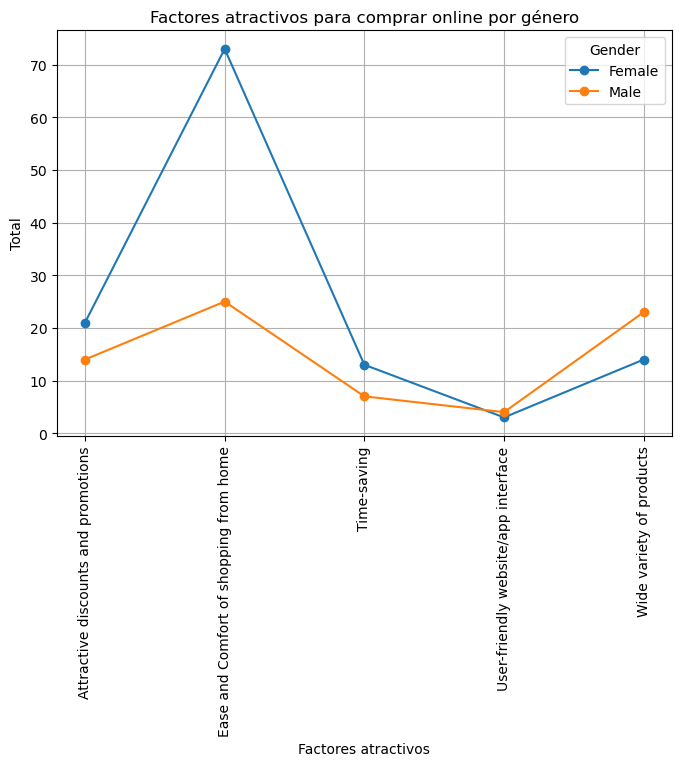

In [288]:
# Agrupar los datos por "Attraction_Factor" y "Gender" y contar las ocurrencias
grouped = df.groupby(['Attraction_Factor', 'Gender']).size().reset_index(name='Cantidad')

# Crear el gráfico de líneas
plt.figure(figsize=(8, 5))

# Iterar sobre cada género 
for gender in grouped['Gender'].unique():
    subset = grouped[grouped['Gender'] == gender]
    plt.plot(subset['Attraction_Factor'], subset['Cantidad'], label=gender, marker='o')

# Personalizar el gráfico
plt.xlabel("Factores atractivos")
plt.ylabel("Total")
plt.title("Factores atractivos para comprar online por género")
plt.legend(title="Gender")  
plt.grid(True)  
plt.tight_layout()  
plt.xticks(rotation=90) 

plt.show()

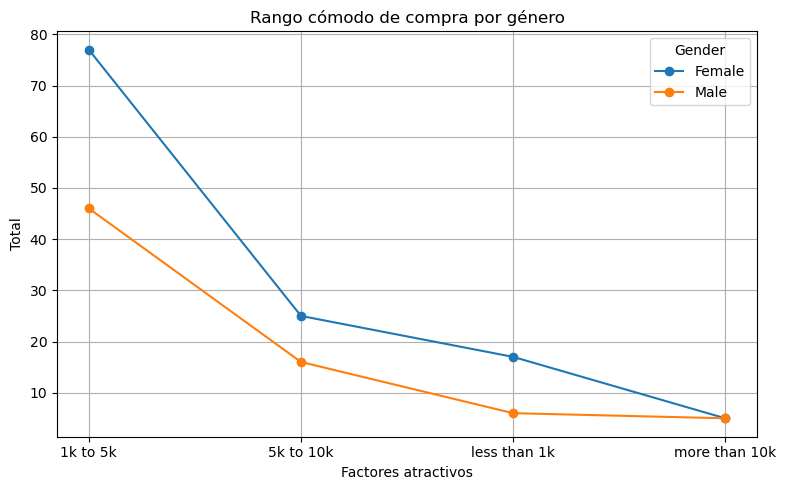

In [27]:
# Agrupar los datos por "Comfortable_Price_Range" y "Gender" y contar las ocurrencias
grouped = df.groupby(["Comfortable_Price_Range", "Gender"]).size().reset_index(name='Cantidad')

# Crear el gráfico de líneas
plt.figure(figsize=(8, 5))

# Iterar sobre cada género y trazar una línea
for gender in grouped["Gender"].unique():
    subset = grouped[grouped["Gender"] == gender]
    plt.plot(subset["Comfortable_Price_Range"], subset["Cantidad"], label=gender, marker="o")

# Personalizar el gráfico
plt.xlabel("Factores atractivos")
plt.ylabel("Total")
plt.title("Rango cómodo de compra por género")
plt.legend(title="Gender")  
plt.grid(True)  
plt.tight_layout()  

plt.show()

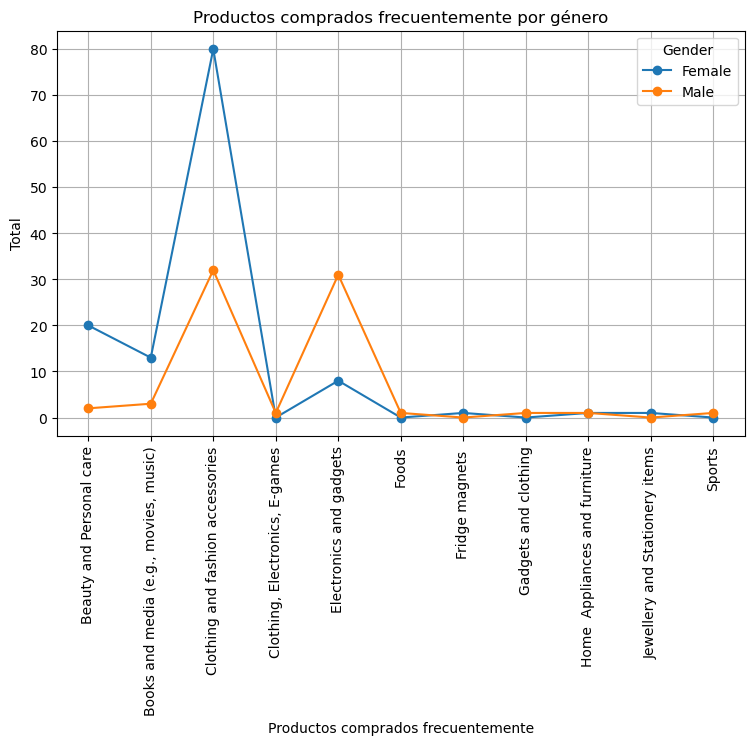

In [359]:
grouped = (
    df.groupby(["Frequent_Products", "Gender"])
    .size()
    .unstack(fill_value=0)
    .stack()
    .reset_index(name="Cantidad")
)

# Crear el gráfico de líneas
plt.figure(figsize=(8, 5))
for gender, subset in grouped.groupby("Gender"):
    plt.plot(subset['Frequent_Products'], subset['Cantidad'], label=gender, marker='o')

# Personalizar el gráfico
plt.xlabel("Productos comprados frecuentemente")
plt.ylabel("Total")
plt.title("Productos comprados frecuentemente por género")
plt.legend(title="Gender")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

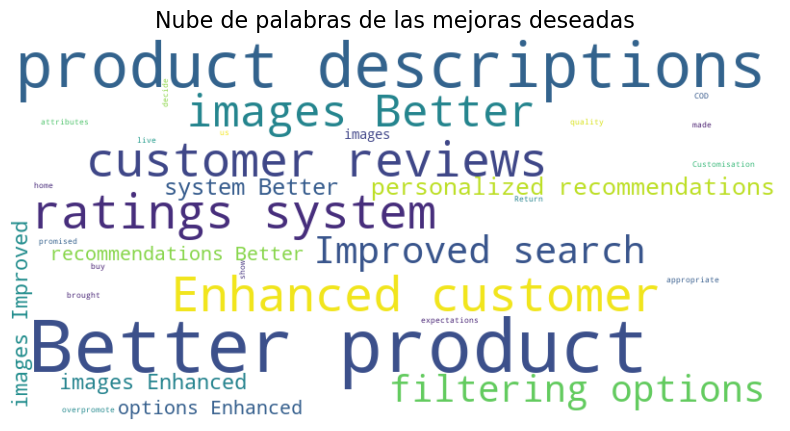

In [29]:
#Creación de una nube de palabras para visualizar las mejoras deseadas más repetidas y relevantes

# Se unen todas las mejoras deseadas en un solo string
texto = ' '.join(df["Desired_Improvements"])

# Creación de la nube de palabras
wordcloud = WordCloud(
    width=800,              # Ancho de la imagen
    height=400,             # Alto de la imagen
    background_color="white",  # Color de fondo
    max_words=50,           # Número máximo de palabras
    colormap="viridis"      # Mapa de colores (opcional)
).generate(texto)

# Representar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.title("Nube de palabras de las mejoras deseadas", fontsize=16,y=1)
plt.show()

## 4- Conclusiones:

Tras realizar diferentes visualizaciones de los aspectos más relevantes de los datos recogidos, se han obtenido muchas posibilidades de mejora.

Como puntos fundamentales destacan la mejora de la **calidad de los productos**, sus **descripciones** e **imágenes asociadas**.
Al tener una gran importancia la puntuación y las opiniones asociadas a los productos online; la calidad de estos, las imágenes del producto y la descripción son esenciales para vender al usuario lo que espera recibir. Al mejorar estos aspectos se pueden ver incrementadas las ventas.

Mejores recomendaciones:
    * A usuarios masculinos recomendaciones de **ropa** y **productos electrónicos** principalmente
    * A usuarias recomendaciones de **productos de belleza** y **ropa** principalmente.
Una columna edad habría sido excelente para poder realizar recomendaciones más personalizadas en función del género y el rango de edad, pero no es posible al no disponerla en la encuesta.

Además, al tener un **68.5%** de usuarios que participan en **promociones**, pueden ser una buena opción para atraer más clientes.

